In [1]:
glove_filename='glove.6B.50d.txt'

In [2]:
from gensim.models import KeyedVectors

In [3]:
model = KeyedVectors.load_word2vec_format(glove_filename, binary=False, no_header=True)

In [4]:
model.get_vector('king')

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

In [5]:
model.get_vector('queen')

array([ 0.37854  ,  1.8233   , -1.2648   , -0.1043   ,  0.35829  ,
        0.60029  , -0.17538  ,  0.83767  , -0.056798 , -0.75795  ,
        0.22681  ,  0.98587  ,  0.60587  , -0.31419  ,  0.28877  ,
        0.56013  , -0.77456  ,  0.071421 , -0.5741   ,  0.21342  ,
        0.57674  ,  0.3868   , -0.12574  ,  0.28012  ,  0.28135  ,
       -1.8053   , -1.0421   , -0.19255  , -0.55375  , -0.054526 ,
        1.5574   ,  0.39296  , -0.2475   ,  0.34251  ,  0.45365  ,
        0.16237  ,  0.52464  , -0.070272 , -0.83744  , -1.0326   ,
        0.45946  ,  0.25302  , -0.17837  , -0.73398  , -0.20025  ,
        0.2347   , -0.56095  , -2.2839   ,  0.0092753, -0.60284  ],
      dtype=float32)

In [6]:
model.most_similar(positive = ['woman', 'king'], negative=['man'], topn=3)
# (+ woman - man) = queen - king = feminité

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172)]

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
father = model.get_vector("father").reshape(1, -1)
mother = model.get_vector("mother").reshape(1, -1)
ball = model.get_vector("ball").reshape(1, -1)
president = model.get_vector("president").reshape(1, -1)
queen = model.get_vector("queen").reshape(1, -1)
king = model.get_vector("king").reshape(1, -1)
girl = model.get_vector("girl").reshape(1, -1)
boy = model.get_vector("boy").reshape(1, -1)

In [9]:
cosine_similarity(father, mother)

array([[0.89090383]], dtype=float32)

In [10]:
cosine_similarity(father-mother, king-queen)

array([[0.66188943]], dtype=float32)

In [11]:
cosine_similarity(king, president)

array([[0.5274762]], dtype=float32)

In [12]:
words_to_viz = ['president', 'obama', 'trump', 'minister', 'power', 'goverment', 'law', 
                'apple', 'banana', 'pasta', 'pizza', 'burger', 'food', 'snack', 'meal', 'dinner',
                'france', 'paris', 'japan', 'tokyo', 'rome', 'italy', 'country', 'city',
                'man', 'woman', 'girl', 'boy', 'daughter', 'son', 'father', 'mother',
                'school', 'college', 'university', 'homework', 'student', 'scholarship',
                'company', 'work', 'employee', 'boss', 'hire', 'salary', 'startup']

In [13]:
embed_to_viz = []
for w in words_to_viz:
    embed_to_viz.append(model[w])

In [14]:
import numpy as np

In [15]:
embed_to_viz = np.array(embed_to_viz)

[]

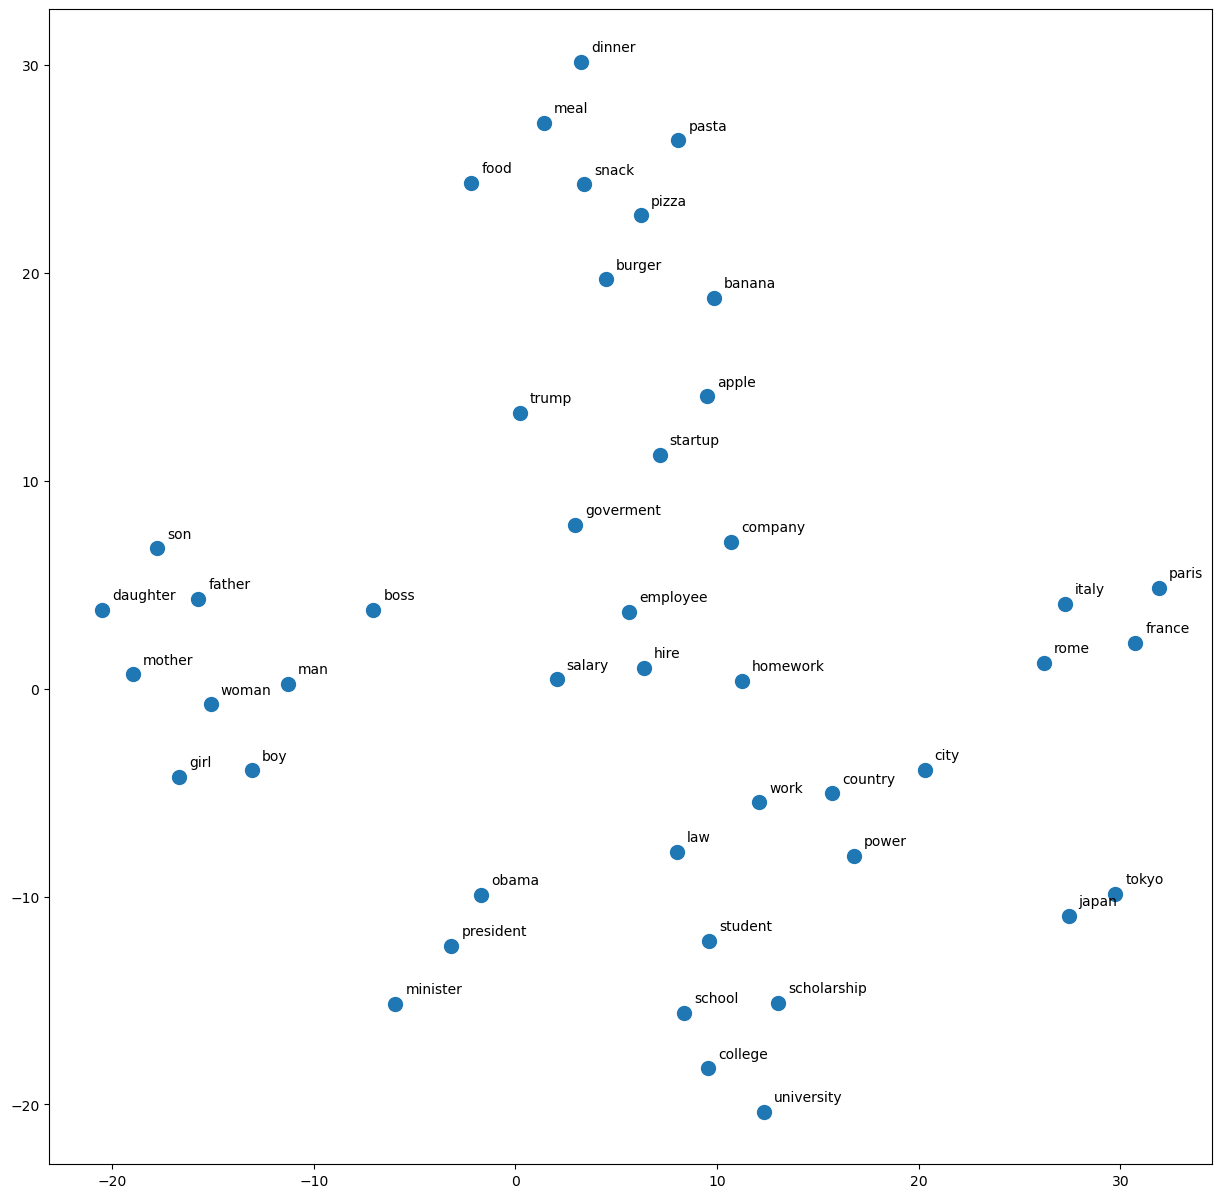

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# We compute the t-SNE of the word embeddings
tsne = TSNE(n_components=2, perplexity=10)
viz = tsne.fit_transform(embed_to_viz)

# We plot the results of the t-SNE
plt.figure(figsize=(15,15))
for i, w in enumerate(words_to_viz):
    plt.annotate(text=w, xy=(viz[i,0], viz[i, 1]), xytext=(viz[i,0]+0.5, viz[i, 1]+0.5))
plt.scatter(viz[:,0], viz[:,1], s=100,)
plt.plot()

# Hugging face

In [17]:
#!pip install -U sentence-transformers


In [18]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/average_word_embeddings_glove.6B.300d')
embeddings = model.encode(sentences)


In [19]:
print(embeddings)

[[-2.64665008e-01 -2.26674005e-01 -3.47996980e-01 -2.62654990e-01
   1.97190508e-01 -9.14949998e-02  2.47254997e-01 -4.24465001e-01
  -2.78364986e-01 -1.52365005e+00  1.21467993e-01  1.36302505e-02
  -3.94914985e-01  1.76838502e-01 -3.47050056e-02 -2.98945010e-01
  -1.14455998e-01 -2.27650031e-02 -1.51705846e-01 -4.99460012e-01
   1.65081993e-01 -1.47114992e-01  1.13208249e-01  2.10548490e-01
  -1.52712509e-01 -3.78019989e-01  4.16520014e-02 -3.06959987e-01
  -1.23482503e-01 -2.67659992e-01 -3.69657487e-01  5.36225021e-01
  -4.02254999e-01  1.31069988e-01 -7.51799941e-02 -2.85070002e-01
  -1.03549957e-02 -4.88460004e-01 -3.78574997e-01  2.42608503e-01
   4.61874485e-01  3.69210020e-02 -3.33090007e-01  1.46139994e-01
  -1.51894510e-01 -1.09146953e-01 -4.75178987e-01  5.64700007e-01
   3.96899953e-02 -6.06149994e-02 -2.58730024e-01 -1.20144993e-01
   2.95935005e-01  2.06270009e-01  1.00895002e-01 -1.57559980e-02
  -1.20039999e-01 -3.19000006e-01  1.16341501e-01 -1.28049999e-02
   5.83079

In [20]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [21]:
embeddings = model.encode(sentences)


In [22]:
print(embeddings)

[[ 6.73593283e-02  7.83935726e-01  2.70018190e-01  9.58026722e-02
   3.89930725e-01  1.33014500e-01  8.51949096e-01 -2.25674912e-01
   2.49908380e-02  1.85417384e-01  2.15237230e-01 -1.49790034e-01
   1.57957420e-01  1.01381950e-01  8.90305459e-01  2.33439341e-01
   7.86207259e-01  3.00011247e-01 -7.10195661e-01 -3.11726779e-01
   8.51574898e-01 -6.04341887e-02 -1.21499486e-01 -5.63790262e-01
  -2.75132746e-01  1.39450088e-01  1.07049249e-01 -2.37949863e-01
   2.08920211e-01 -2.28107944e-01 -2.22003356e-01 -7.31372833e-02
   1.53638527e-01 -5.19386753e-02 -5.07329181e-02  3.23611289e-01
   2.23328501e-01  7.97795951e-01  9.15641561e-02  2.07636468e-02
  -2.19855234e-01 -2.75380999e-01  2.45376099e-02  2.46631894e-02
  -2.31251076e-01 -5.35811245e-01 -3.87020409e-02 -4.36319824e-04
  -7.61946617e-03 -4.71226215e-01 -4.18657362e-01 -7.82945529e-02
  -5.27384102e-01 -9.72349755e-03  1.03735598e-02  7.64500275e-02
   1.46776646e-01  1.63461044e-01 -4.44002002e-01 -2.12629631e-01
  -4.70422